# Visualize World Development Indicators

https://databank.worldbank.org/reports.aspx?source=world-development-indicators

In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.animation as animation

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Get the data

In [3]:
filename = '../datasets/World Bank DataBank World Development Indicators/indicators.csv'

df = pd.read_csv(filename, na_values='..')

nrows, ncolumns = df.shape
print(f'{nrows} rijen en {ncolumns} kolommen')

1524 rijen en 54 kolommen


### EDA - Exploratory Data Analysis

In [4]:
df.head(20)

,Country Name,Country Code,Series Name,Series Code,1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],1981 [YR1981],1982 [YR1982],1983 [YR1983],1984 [YR1984],1985 [YR1985],1986 [YR1986],1987 [YR1987],1988 [YR1988],1989 [YR1989],1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,2.155555e+09,2.366667e+09,2.555556e+09,2.953333e+09,3.300000e+09,3.697940e+09,3.641723e+09,3.478788e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.825701e+09,4.520947e+09,5.224897e+09,6.203256e+09,6.971758e+09,9.747886e+09,1.010930e+10,1.241615e+10,1.585667e+10,1.780510e+10,1.990733e+10,2.014642e+10,2.049713e+10,1.913422e+10,1.811657e+10,1.875346e+10,1.805322e+10,1.879944e+10,1.995593e+10,1.426650e+10,NaN,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1.186988e+07,1.215739e+07,1.242527e+07,1.268730e+07,1.293886e+07,1.298637e+07,1.248663e+07,1.115520e+07,1.008829e+07,9.951449e+06,1.024369e+07,1.051222e+07,1.044844e+07,1.032276e+07,1.038346e+07,1.067317e+07,1.069480e+07,1.074517e+07,1.205743e+07,1.400376e+07,1.545556e+07,1.641891e+07,1.710660e+07,1.778882e+07,1.849313e+07,1.926285e+07,1.954298e+07,1.968863e+07,2.100026e+07,2.264513e+07,2.355355e+07,2.441119e+07,2.544294e+07,2.590330e+07,2.642720e+07,2.738531e+07,2.818967e+07,2.924916e+07,3.046648e+07,3.154121e+07,3.271621e+07,3.375350e+07,3.463621e+07,3.564342e+07,3.668678e+07,3.776950e+07,3.897223e+07,4.009946e+07,4.112877e+07,NaN
2,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,3.955000e+01,4.010000e+01,4.064500e+01,4.122800e+01,4.027100e+01,3.908600e+01,3.961800e+01,4.016400e+01,3.776600e+01,3.818700e+01,3.332900e+01,3.355000e+01,3.939600e+01,3.984400e+01,4.395800e+01,4.515800e+01,4.596700e+01,4.666300e+01,4.759600e+01,5.146600e+01,5.149500e+01,5.254400e+01,5.324300e+01,5.363400e+01,5.294300e+01,5.484600e+01,5.529800e+01,5.579800e+01,5.645400e+01,5.734400e+01,5.794400e+01,5.836100e+01,5.868400e+01,5.911100e+01,5.985200e+01,6.036400e+01,6.085100e+01,6.141900e+01,6.192300e+01,6.241700e+01,6.254500e+01,6.265900e+01,6.313600e+01,6.301600e+01,6.308100e+01,6.356500e+01,6.257500e+01,6.198200e+01,6.287900e+01,NaN
3,Afghanistan,AFG,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.700759e+01,1.781492e+01,2.142946e+01,2.510707e+01,2.891982e+01,3.271721e+01,3.996990e+01,4.326077e+01,4.657988e+01,5.236305e+01,5.261354e+01,5.630554e+01,6.018958e+01,6.005854e+01,6.148646e+01,6.690922e+01,7.133430e+01,7.423411e+01,8.028806e+01,8.131976e+01,NaN,NaN
4,Afghanistan,AFG,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.443391e+00,8.941258e+00,9.808474e+00,9.948289e+00,1.062277e+01,9.904675e+00,1.025650e+01,9.818487e+00,8.569672e+00,8.561908e+00,7.897169e+00,8.805964e+00,9.528878e+00,1.010535e+01,1.181859e+01,1.262082e+01,1.420842e+01,1.483132e+01,1.553361e+01,2.182795e+01,NaN,NaN
5,Afghanistan,AFG,"GDP per capita, PPP (constant 2021 internation...",NY.GDP.PCAP.PP.KD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.806234e+03,1.822978e+03,1.777454e+03,1.907597e+03,1.928294e+03,2.155898e+03,2.196100e+03,2.572590e+03,2.858127e+03,2.766342e+03,2.994486e+03,3.054452e+03,3.024982e+03,2.974573e+03,2.964287e+03,2.956770e+03,2.906843e+0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1524 entries, 0 to 1523
Data columns (total 54 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country Name   1521 non-null   object 
 1   Country Code   1519 non-null   object 
 2   Series Name    1519 non-null   object 
 3   Series Code    1519 non-null   object 
 4   1974 [YR1974]  751 non-null    float64
 5   1975 [YR1975]  754 non-null    float64
 6   1976 [YR1976]  756 non-null    float64
 7   1977 [YR1977]  758 non-null    float64
 8   1978 [YR1978]  759 non-null    float64
 9   1979 [YR1979]  759 non-null    float64
 10  1980 [YR1980]  772 non-null    float64
 11  1981 [YR1981]  775 non-null    float64
 12  1982 [YR1982]  778 non-null    float64
 13  1983 [YR1983]  779 non-null    float64
 14  1984 [YR1984]  781 non-null    float64
 15  1985 [YR1985]  783 non-null    float64
 16  1986 [YR1986]  786 non-null    float64
 17  1987 [YR1987]  791 non-null    float64
 18  1988 [YR

In [6]:
df[['Series Code', 'Series Name']].value_counts()

Series Code        Series Name                                        
NY.GDP.MKTP.CD     GDP (current US$)                                      217
NY.GDP.PCAP.PP.KD  GDP per capita, PPP (constant 2021 international $)    217
SH.XPD.CHEX.GD.ZS  Current health expenditure (% of GDP)                  217
SH.XPD.CHEX.PC.CD  Current health expenditure per capita (current US$)    217
SP.DYN.LE00.IN     Life expectancy at birth, total (years)                217
SP.DYN.TFRT.IN     Fertility rate, total (births per woman)               217
SP.POP.TOTL        Population, total                                      217
Name: count, dtype: int64

In [7]:
df[['Country Code', 'Country Name']].value_counts()

Country Code  Country Name                  
ABW           Aruba                             7
OMN           Oman                              7
MYS           Malaysia                          7
NAM           Namibia                           7
NCL           New Caledonia                     7
NER           Niger                             7
NGA           Nigeria                           7
NIC           Nicaragua                         7
NLD           Netherlands                       7
NOR           Norway                            7
NPL           Nepal                             7
NRU           Nauru                             7
NZL           New Zealand                       7
PAK           Pakistan                          7
LBR           Liberia                           7
PAN           Panama                            7
PER           Peru                              7
PHL           Philippines                       7
PLW           Palau                             7
PNG  

In [8]:
df.dropna(subset='Country Code', inplace=True)

In [9]:
df.rename(columns=lambda s: s[:4].strip() if '[YR' in s else s, inplace=True)

In [10]:
df.head()

,Country Name,Country Code,Series Name,Series Code,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,2.155555e+09,2.366667e+09,2.555556e+09,2.953333e+09,3.300000e+09,3.697940e+09,3.641723e+09,3.478788e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.825701e+09,4.520947e+09,5.224897e+09,6.203256e+09,6.971758e+09,9.747886e+09,1.010930e+10,1.241615e+10,1.585667e+10,1.780510e+10,1.990733e+10,2.014642e+10,2.049713e+10,1.913422e+10,1.811657e+10,1.875346e+10,1.805322e+10,1.879944e+10,1.995593e+10,1.426650e+10,NaN,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1.186988e+07,1.215739e+07,1.242527e+07,1.268730e+07,1.293886e+07,1.298637e+07,1.248663e+07,1.115520e+07,1.008829e+07,9951449.000,1.024369e+07,10512221.00,1.044844e+07,1.032276e+07,1.038346e+07,1.067317e+07,1.069480e+07,1.074517e+07,1.205743e+07,1.400376e+07,1.545556e+07,1.641891e+07,1.710660e+07,1.778882e+07,1.849313e+07,1.926285e+07,1.954298e+07,1.968863e+07,2.100026e+07,2.264513e+07,2.355355e+07,2.441119e+07,2.544294e+07,2.590330e+07,2.642720e+07,2.738531e+07,2.818967e+07,2.924916e+07,3.046648e+07,3.154121e+07,3.271621e+07,3.375350e+07,3.463621e+07,3.564342e+07,3.668678e+07,3.776950e+07,3.897223e+07,4.009946e+07,4.112877e+07,NaN
2,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,3.955000e+01,4.010000e+01,4.064500e+01,4.122800e+01,4.027100e+01,3.908600e+01,3.961800e+01,4.016400e+01,3.776600e+01,38.187,3.332900e+01,33.55,3.939600e+01,3.984400e+01,4.395800e+01,4.515800e+01,4.596700e+01,4.666300e+01,4.759600e+01,5.146600e+01,5.149500e+01,5.254400e+01,5.324300e+01,5.363400e+01,5.294300e+01,5.484600e+01,5.529800e+01,5.579800e+01,5.645400e+01,5.734400e+01,5.794400e+01,5.836100e+01,5.868400e+01,5.911100e+01,5.985200e+01,6.036400e+01,6.085100e+01,6.141900e+01,6.192300e+01,6.241700e+01,6.254500e+01,6.265900e+01,6.313600e+01,6.301600e+01,6.308100e+01,6.356500e+01,6.257500e+01,6.198200e+01,6.287900e+01,NaN
3,Afghanistan,AFG,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.700759e+01,1.781492e+01,2.142946e+01,2.510707e+01,2.891982e+01,3.271721e+01,3.996990e+01,4.326077e+01,4.657988e+01,5.236305e+01,5.261354e+01,5.630554e+01,6.018958e+01,6.005854e+01,6.148646e+01,6.690922e+01,7.133430e+01,7.423411e+01,8.028806e+01,8.131976e+01,NaN,NaN
4,Afghanistan,AFG,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.443391e+00,8.941258e+00,9.808474e+00,9.948289e+00,1.062277e+01,9.904675e+00,1.025650e+01,9.818487e+00,8.569672e+00,8.561908e+00,7.897169e+00,8.805964e+00,9.528878e+00,1.010535e+01,1.181859e+01,1.262082e+01,1.420842e+01,1.483132e+01,1.553361e+01,2.182795e+01,NaN,NaN


### Convert from long format to wide format

In [11]:
df_pivot = df.melt(id_vars=['Country Name', 'Country Code', 'Series Name', 'Series Code'], 
                   value_vars=list(df.columns)[4:], 
                   var_name='Year')

df_pivot = df_pivot.pivot(index=['Country Name', 'Country Code', 'Year'], 
                          columns=['Series Name'], 
                          values='value').reset_index()

df_pivot['Year'] = df_pivot['Year'].astype('int')
df_pivot.head()

Series Name,Country Name,Country Code,Year,Current health expenditure (% of GDP),Current health expenditure per capita (current US$),"Fertility rate, total (births per woman)",GDP (current US$),"GDP per capita, PPP (constant 2021 international $)","Life expectancy at birth, total (years)","Population, total"
0,Afghanistan,AFG,1974,NaN,NaN,7.526,2.155555e+09,NaN,39.550,11869879.0
1,Afghanistan,AFG,1975,NaN,NaN,7.542,2.366667e+09,NaN,40.100,12157386.0
2,Afghanistan,AFG,1976,NaN,NaN,7.561,2.555556e+09,NaN,40.645,12425267.0
3,Afghanistan,AFG,1977,NaN,NaN,7.591,2.953333e+09,NaN,41.228,12687301.0
4,Afghanistan,AFG,1978,NaN,NaN,7.599,3.300000e+09,NaN,40.271,12938862.0


### Add continent

In [12]:
url = 'https://statisticstimes.com/geography/countries-by-continents.php'

df_countries_by_continents = pd.read_html(url, index_col=0)[2]
df_countries_by_continents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249 entries, 1 to 249
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country or Area  249 non-null    object
 1   ISO-alpha3 Code  248 non-null    object
 2   M49 Code         249 non-null    int64 
 3   Region 1         249 non-null    object
 4   Region 2         108 non-null    object
 5   Continent        249 non-null    object
dtypes: int64(1), object(5)
memory usage: 13.6+ KB


In [13]:
df_pivot = df_pivot.merge(df_countries_by_continents[['ISO-alpha3 Code','Continent']], 
                          left_on='Country Code', 
                          right_on='ISO-alpha3 Code')
df_pivot.head()

,Country Name,Country Code,Year,Current health expenditure (% of GDP),Current health expenditure per capita (current US$),"Fertility rate, total (births per woman)",GDP (current US$),"GDP per capita, PPP (constant 2021 international $)","Life expectancy at birth, total (years)","Population, total",ISO-alpha3 Code,Continent
0,Afghanistan,AFG,1974,NaN,NaN,7.526,2.155555e+09,NaN,39.550,11869879.0,AFG,Asia
1,Afghanistan,AFG,1975,NaN,NaN,7.542,2.366667e+09,NaN,40.100,12157386.0,AFG,Asia
2,Afghanistan,AFG,1976,NaN,NaN,7.561,2.555556e+09,NaN,40.645,12425267.0,AFG,Asia
3,Afghanistan,AFG,1977,NaN,NaN,7.591,2.953333e+09,NaN,41.228,12687301.0,AFG,Asia
4,Afghanistan,AFG,1978,NaN,NaN,7.599,3.300000e+09,NaN,40.271,12938862.0,AFG,Asia


In [14]:
selected_columns = ['Country Name', 
                    'Year', 
                    'Population, total',
                    'Fertility rate, total (births per woman)',
                    'Life expectancy at birth, total (years)',
                    'Continent']

df_selected = df_pivot[selected_columns]
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10750 entries, 0 to 10749
Data columns (total 6 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Country Name                              10750 non-null  object 
 1   Year                                      10750 non-null  int64  
 2   Population, total                         10519 non-null  float64
 3   Fertility rate, total (births per woman)  10143 non-null  float64
 4   Life expectancy at birth, total (years)   10135 non-null  float64
 5   Continent                                 10750 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 504.0+ KB


### Save intermediate data

In [15]:
df_selected.to_csv('../datasets/World Bank DataBank World Development Indicators/indicators_selected.csv', index=False)

In [16]:
year_min = df_selected['Year'].min()
year_max = df_selected['Year'].max()

print(year_min, year_max)

year = year_max - 1

df_year = df_selected[df_selected['Year'] == year]

1974 2023


### Plot

In [17]:
green = '#30ee40'
yellow = '#fee717'
red = '#fe5c75'
blue = '#5cdeee'

continent_colors = dict(zip(df_year['Continent'].unique(), [red, yellow, blue, red, green, green]))
colors = df_year['Continent'].replace(continent_colors).values

In [18]:
scale_factor = 8000 / 1262645000.0
sizes = df_year['Population, total'].values * scale_factor

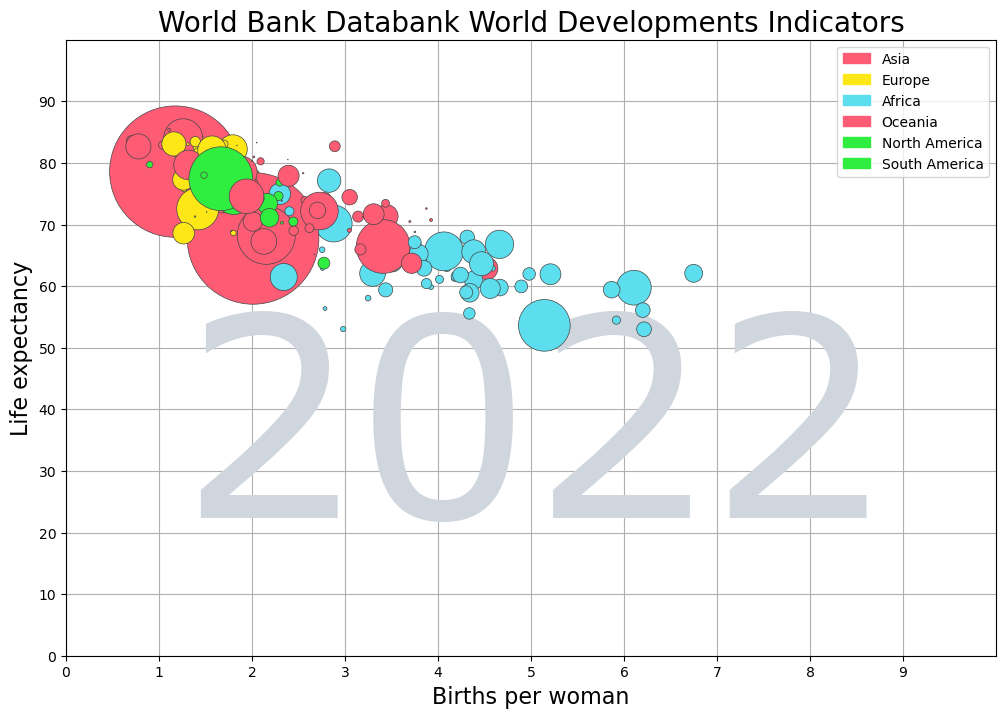

In [19]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter('Fertility rate, total (births per woman)', 
           'Life expectancy at birth, total (years)', 
           data = df_year,
           c = colors,
           s = sizes,
           edgecolor = '#444',
           linewidth = 0.5,
           zorder= 10,
           label = None)

ax.set_title('World Bank Databank World Developments Indicators', fontsize=20)
ax.set_xlim(0, 10)
ax.set_ylim(0, 100)
ax.set_xticks(range(0, 10))
ax.set_yticks(range(0, 100, 10))
ax.set_xlabel('Births per woman', fontsize=16)
ax.set_ylabel('Life expectancy', fontsize=16)
ax.text(0.5, 0.35, str(year), 
        transform=ax.transAxes,
        horizontalalignment='center', verticalalignment='center',
        fontfamily='verdana', fontsize=200, color='#cfd6de')
ax.grid()
ax.set_axisbelow(True)
patches = [mpatches.Patch(color=color, label=continent) for continent, color in continent_colors.items()]
ax.legend(handles=patches)

plt.show()

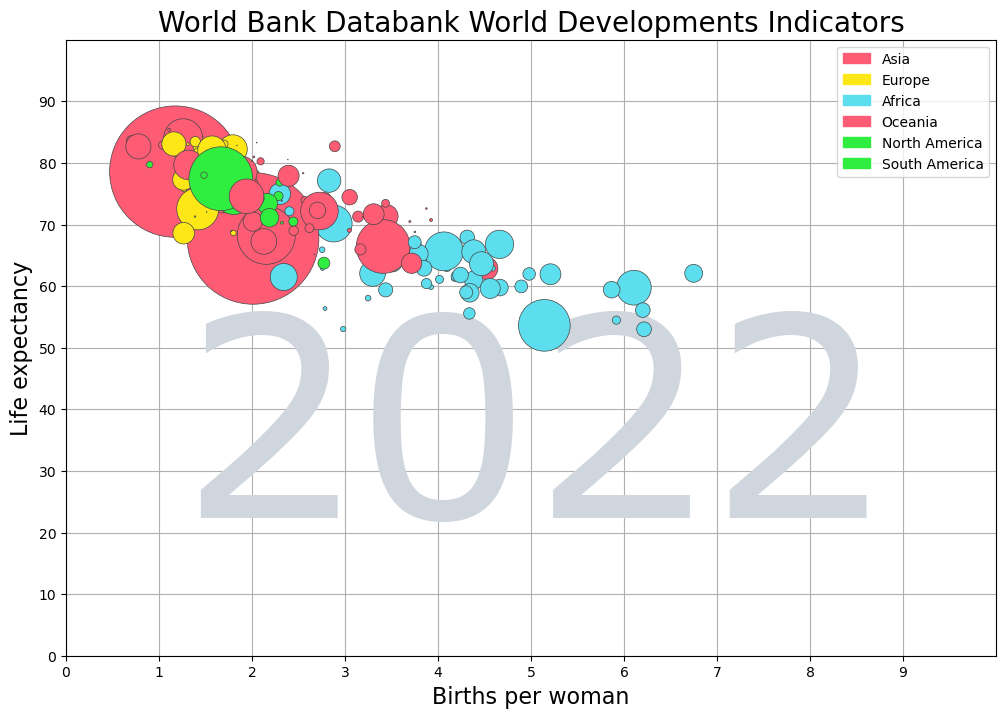

In [37]:
def plot(year):
        fig, ax = plt.subplots(figsize=(12, 8))

        df_year = df_selected[df_selected['Year'] == year]

        ax.scatter('Fertility rate, total (births per woman)', 
                'Life expectancy at birth, total (years)', 
                data = df_year,
                c = colors,
                s = sizes,
                edgecolor = '#444',
                linewidth = 0.5,
                zorder= 10,
                label = None)

        ax.set_title('World Bank Databank World Developments Indicators', fontsize=20)
        ax.set_xlim(0, 10)
        ax.set_ylim(0, 100)
        ax.set_xticks(range(0, 10))
        ax.set_yticks(range(0, 100, 10))
        ax.set_xlabel('Births per woman', fontsize=16)
        ax.set_ylabel('Life expectancy', fontsize=16)
        ax.text(0.5, 0.35, str(year), 
                transform = ax.transAxes,
                horizontalalignment = 'center', verticalalignment = 'center',
                fontfamily = 'verdana', fontsize = 200, color = '#cfd6de')
        ax.grid()
        ax.set_axisbelow(True)
        patches = [mpatches.Patch(color=color, label=continent) for continent, color in continent_colors.items()]
        ax.legend(handles=patches)

        plt.show()

plot(year=2022)


In [27]:
import ipywidgets

In [38]:
year_slider = ipywidgets.IntSlider(
    value=year_max-1,
    min=year_min,
    max=year_max,
    step=1,
    description='Year',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

display(year_slider)


IntSlider(value=2022, continuous_update=False, description='Year', max=2023, min=1974)

In [39]:
out = ipywidgets.interactive_output(plot, {'year': year_slider})

display(out)
display(year_slider)

Output()

IntSlider(value=2022, continuous_update=False, description='Year', max=2023, min=1974)